House Prices - Advanced Regression Techniques
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()

In [3]:
house_df.shape

(1460, 81)

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
# PoolQC : 수영장 품질
#LotFrontage : 부동산에 연결된 거리의 선형 피트

isnull_series = house_df.isnull().sum()
#null값 있는 애들만 
isnull_series[isnull_series > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

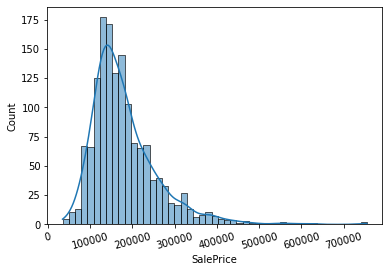

In [8]:
#SalePrice가 label 값이니까 분포를 보자 
#kde=True - 곡선도 함께


plt.xticks(rotation=15) #15도 회전해서 나옴
sns.histplot(house_df.SalePrice, kde=True)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

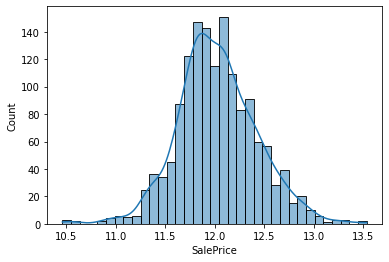

In [9]:
#정규분포 형태로 변환하기 위해 로그 변환시행
log_SalePrice = np.log1p(house_df.SalePrice)
sns.histplot(log_SalePrice, kde=True)

In [10]:
#로그 변환 반영
org_SalePrice = house_df.SalePrice
house_df.SalePrice = np.log1p(house_df.SalePrice)

#null값이 너무 많은 불필요한 컬럼 삭제 
house_df.drop(['Id', 'PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

#드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체 --> 이제 문자형들만 남겠지 
house_df.fillna(house_df.mean(), inplace=True)



In [14]:
#NUll 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('##Null 피처의 Type:\n', house_df.dtypes[null_column_count.index])

##Null 피처의 Type:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


#### [과제 1012_2] 문자형 피처는 모두 원핫인코딩 변환 수행 후 선형회귀 모델을 적용하여 학습/예측/평가



In [15]:
#이제 문자형 피처를 제외하고는 Null값이 없음.

house_df_ohe = pd.get_dummies(house_df)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('##Null 피처의 Type:\n', house_df.dtypes[null_column_count.index])

#원핫 인코딩은 null 값을 0으로 바꿔주기에 , null 값을 가진 피처는 이제 존재하지 않음

##Null 피처의 Type:
 Series([], dtype: object)


In [19]:
#여러 모델의 로그 변환된 RMSE 계산 함수 정의 

def get_rmse(model):
    """단일 모델의 RMSE 값을 반환"""
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    """여러 모델의 RMSE 값을 반환"""
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses



In [20]:
#선형회귀 모델 학습/예측/평가

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

#y_target을 위에서 이미 로그 변환 시켜줬으니, 예측값 역시 로그변환값
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

#라쏘의 경우 타 회귀방식보다 성능이 많이 떨어지는 결과가 나옴 -> 하이퍼 파라미터 튜닝 필요 

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154008, 0.1275084633405304, 0.17628250556471403]

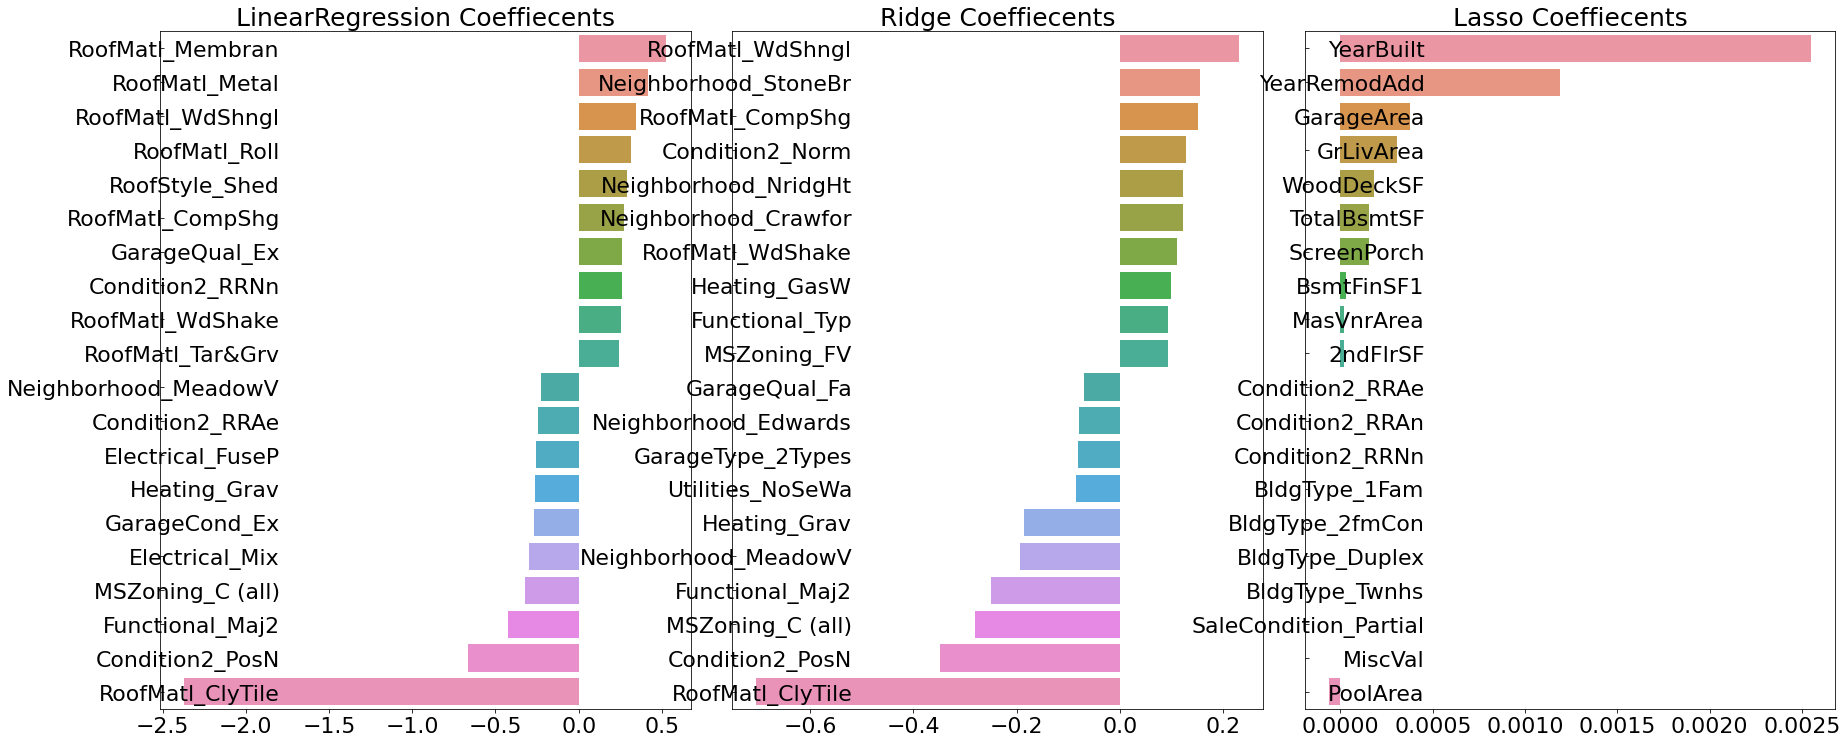

In [23]:
#모델별로 회귀계수 추출 


def get_top_bottom_coef(model, n=10):
    """상위 10개, 하위 10개의 피처명, 회귀계수값 반환"""
    #coef_ 속성을 기반으로 Series 객체를 생성, index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low


def visualize_coefficient(models):
    """모델별 회귀 계수 시각화"""
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()  #tight_layout()메소드는 서브 플롯간에 올바른 간격을 자동으로 유지
    
    #입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        #ax subplot에 bar차트로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__ + ' '+'Coeffiecents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#Lasso의 경우 다른 두 개의 모델과 다른 회귀 계수 형태를 보이고 있음.

In [26]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

#여전히 라쏘의 경우가 가장 성능이 떨어진다. 


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


In [29]:
#모델과 하이퍼 파라미터 딕셔너리 객체를 인자로 넣어서, 최적의 작업 결과를 반환하는 함수 생성
#alpha 하이퍼 파라미터를 조절해서 릿지, 라쏘의 최적값 도출해보기

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 cv 시 최적 평균 RMSE 값{1}, 최적 alpah:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 cv 시 최적 평균 RMSE 값0.1418, 최적 alpah:{'alpha': 12}
Lasso 5 cv 시 최적 평균 RMSE 값0.142, 최적 alpah:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


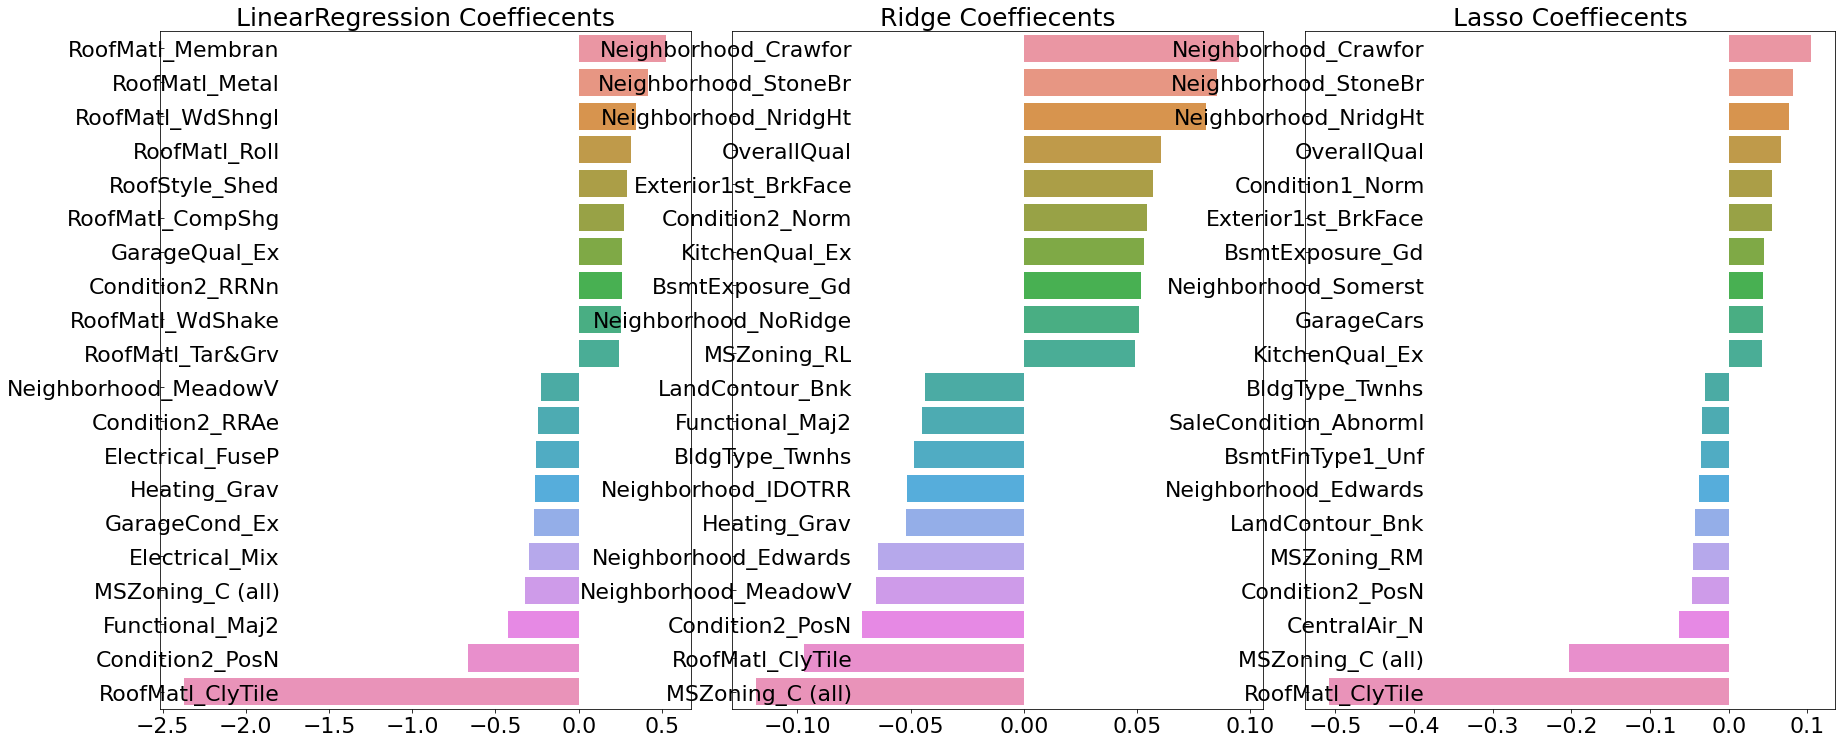

In [30]:
#위의 최적화 alpha 값으로 학습 데이터 학습, 테스트 데이터로 예측 및 수행.

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

#모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

#모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#alpha 값 최적화 후, 테스트 데이터 세트의 예측 성능이 더 좋아짐
#모델별 회귀계수도 많이 달라짐

#기존에는 lasso의 회귀 계수가 나머지 두 모델과 차이가 있었지만, 이번에는 릿지와 비슷한 피처의 회귀계수가 높음
#but, 릿지에 비해 회귀 계수의 값이 상당히 작음 

#### [과제 1012_3] 데이터 왜곡 로그 변환 후 성능 평가
- stats 모듈의 skew()함수를 이용해 컬럼의 데이터 세트의 왜곡 정도를 추출
- --> 1이상인 경우를 왜곡 정도가 높다고 판단.


In [32]:
#피처 데이터 세트의 데이터 분포도의 왜곡 확인 
# stats 모듈의 skew()를 적용하는 숫자형 피처에서 원핫 인코딩된 카테고리 숫자형 피처는 제외해야함

from scipy.stats import skew

#object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

#house_df에 칼럼 index로 불린 인덱싱, apply로 skew()호출
skew_features = house_df[features_index].apply(lambda x: skew(x))

#skew(왜곡) 정도가 1이상인 칼럼만 추출

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [33]:
#추출된 왜곡 정도가 높은 피처를 로그 변환

house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [34]:
#왜곡 정도가 높은 일부 피처를 로그 변환 했으니 다시 원핫인코딩, 피처/타깃 데이터 세트 생성 

house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

#다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

#Ridge의 alpha값이 10로 바뀌었고, 두 모델 전부 5폴드 교차 검증의 평균의 RMSE값이 향상 됨.

Ridge 5 cv 시 최적 평균 RMSE 값0.1275, 최적 alpah:{'alpha': 10}
Lasso 5 cv 시 최적 평균 RMSE 값0.1252, 최적 alpah:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.119


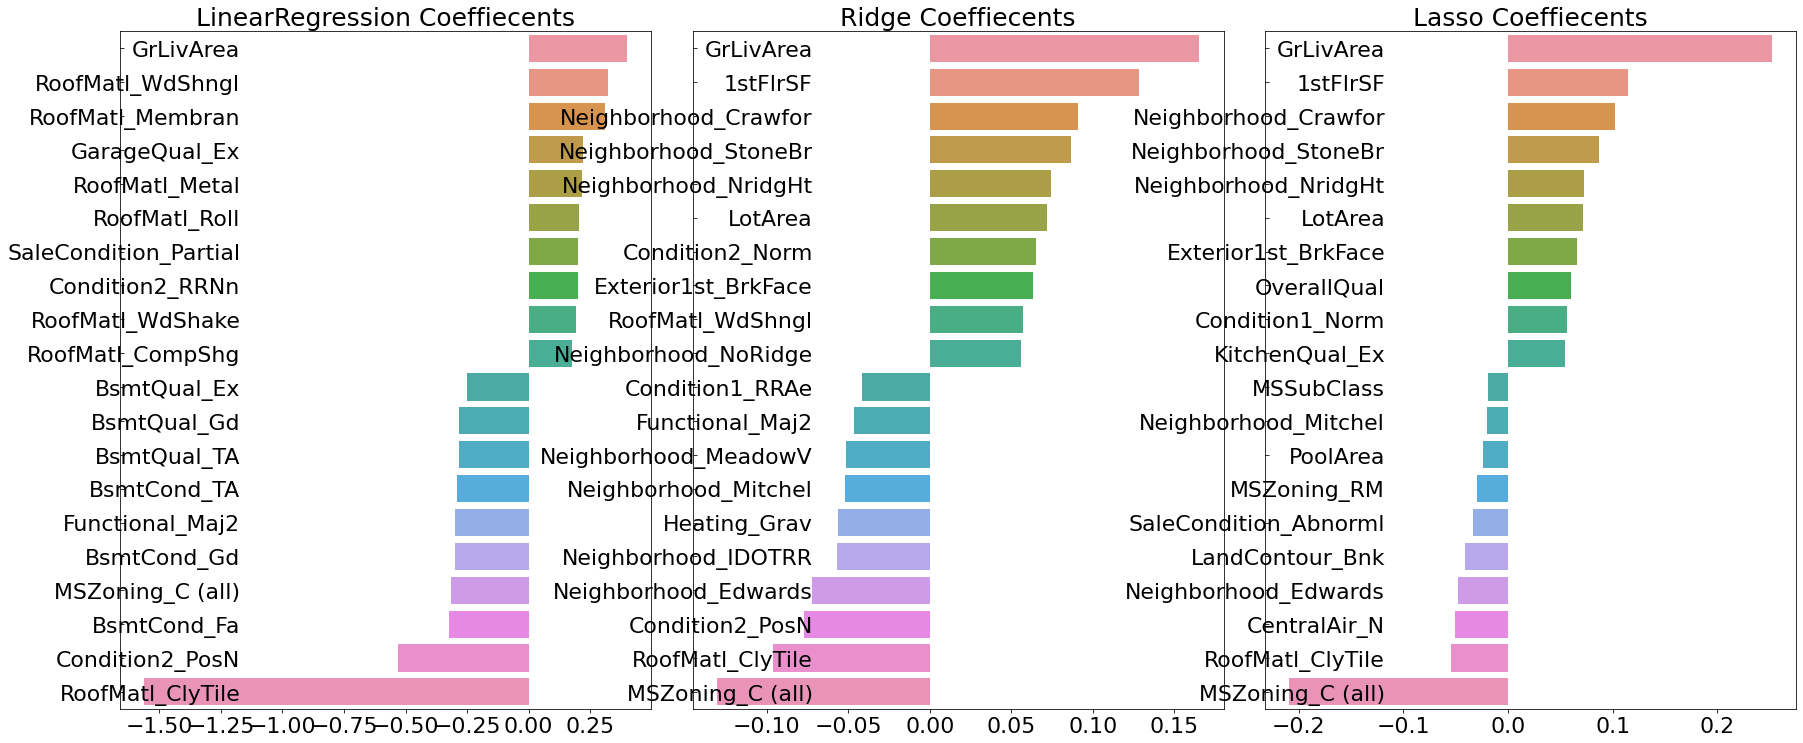

In [35]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#세 모델 모두 GrLivArea, 주거공간크기가 회귀 계수가 가장 높은 피처가 됨.

#### [과제 1012_4] 이상치 제거 후 성능 평가(lr, Ridge, Lasso)

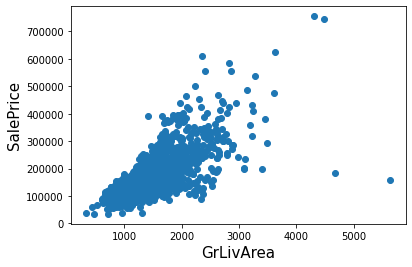

In [36]:
#맨 처음에 정의한 데이터가 변환되기 이전의 원본 데이터 세트인 house_df_org에서
#예측에 많은 영향을 미치는 중요 피처인 GrLivArea와 SalePrice의 관계를 시각화

plt.scatter(x = house_df_org['GrLivArea'],y=house_df_org['SalePrice'] )
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [38]:
#주거 공간이 큰 집일수록 가격이 비싸기떄문에, 둘은 양의 상관도가 높음을 알 수 있음
#but,  평당 4000피트 이상임에도 가격이 500,000달러 이하인 2개의 이상치는 양의 상관 관계에 어긋남 
# 이상치로 판단하고 제거

cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index:', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape:',house_df_ohe.shape )

#인덱스를 통해 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape:',house_df_ohe.shape)

이상치 레코드 index: [ 523 1298]
이상치 삭제 전 house_df_ohe shape: (1460, 271)
이상치 삭제 후 house_df_ohe shape: (1458, 271)


In [39]:
#이상치 제거했으니 다시 데이터 셋 생성, 모델 최적화 수행
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

#다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

#ridge alpha값이 최종 12에서 8로 변환, 두 모델의 rmse값 개선 

Ridge 5 cv 시 최적 평균 RMSE 값0.1125, 최적 alpah:{'alpha': 8}
Lasso 5 cv 시 최적 평균 RMSE 값0.1122, 최적 alpah:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


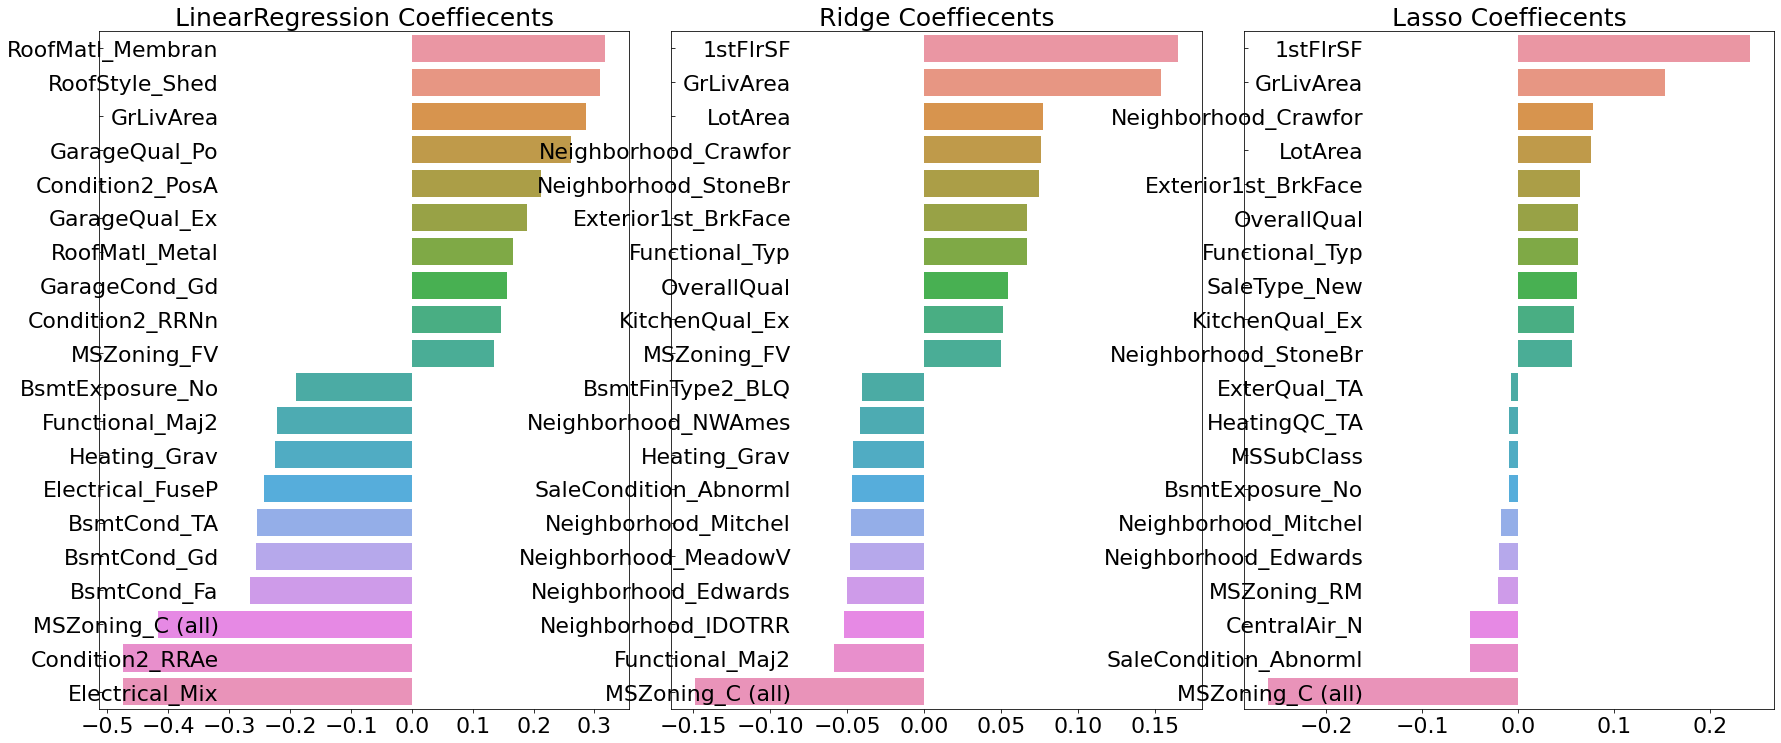

In [40]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#이상치가 제거된 데이터 세트를 기반으로 다시 데이터 세트 분할하고, RMSE 수치, 회귀 계수 시각화 결과 

#### [과제 1012_5] 회귀 트리 학습/예측/평가